In [1]:
using constants
using types
using Optim
using PyPlot
using data

In [2]:
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

electronicProps (generic function with 1 method)

In [3]:
Eoff=0.0
Ts=collect(300:10.0:900.0)
numofn=[-1.3e20]#[-1.3e20,-0.7e20,-0.022e20,-0.2e20]#,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
numofnn=[1e17]#[1e17,1e17,1e17,1e17]
xs=[0.2]#[0.287,0.3,0.262,0.332]#collect(0.0:0.01:1.0)

var0=[Ts[1],xs[1]]
Eoff=2.0
Ev(var)=Eoff
Ec(var)=Ev(var)+EgSiGe(var[1],var[2]) #var[1]:T var[2]:x

effMassV(var)=-1.2*me
effMassC(var)=0.424*me#1.4/6^(2/3)*me

bandC=parBandTx(effMassC(var0),0.0,Ec(var0),[Ec],[effMassC],var0)
bandV=parBandTx(effMassV(var0),0.0,Ev(var0),[Ev],[effMassV],var0)
#bndstTx=BandStrucTx([bandV,bandC,bandC,bandC,bandC,bandC,bandC],var0)
bndstTx=BandStrucTx([bandC,bandC,bandC,bandC,bandC,bandC,bandV],var0)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI
Def_ph=5.0*q #eV
md=1.4*me;
function Deftemp(array)
    return 15
end
ksi=21.0
tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[1]),var[2],var[1],var[3],var[6])#DefP(var[1])
tauII2(var)=tauII2_func(ksi*eps0,eps0,var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(ksi*eps0,var[1],var[9])
vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
#vartau0=[bandC.effMass,Ts[1],1.0,xs[1],1.5,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI],vartau0)#tauNI,,tauII2
xmax=3.0
#############Lattice Thermal Conductivity Parameters###############
thetaSiL=586.0 # K 
thetaSiT=240.0 # K
vSiL=8430.0    # m/s
vSiT=5840.0    # m/s
vGeL=4920.0    # m/s
vGeT=3540.0    # m/s
gammaL=0.3
gammaT=0.6
MSi=4.6637e-26 # kg
MGe=1.206e-25  # kg
VSi=2.0024e-29
Eh=3.8
xsp=0.2
Tp=300.0
p=1.0
D=20e-9
NP=0
a=0.488
vv=[7728.0,3760.0,3760.0]
#vartauPH0=[integration_var,T,gammaL,gammaT,xs,thetaL,thetaTx,thetaTy]

thetaCLx=thetaCL(a,xsp,thetaSiL,vSiL,VSi)
thetaCTx=thetaCT(a,xsp,thetaSiT,vSiL,VSi)
vartauPH0=[0.0,Tp,gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a]

tauPHNLf(var)=tauPH_NL(var[3],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeL_PH(var[5]))
tauPHNTf(var)=tauPH_NT(var[4],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeT_PH(var[5]))


tauPHULf(var)=tauPH_U(var[3],var[1],var[2],MSiGe(var[5]),vSiGeL_PH(var[5]),thetaSiL)
tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],MSiGe(var[5]),vSiGeT_PH(var[5]),thetaSiT)

tauPHALLLf(var)=tauPH_ALL(var[9],var[10],var[5],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeL_PH(var[5]))
tauPHALLTf(var)=tauPH_ALL(var[9],var[10],var[5],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeT_PH(var[5]))

#tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf],vartauPH0)
tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHALLLf],vartauPH0)
tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
tauPHRL=tau_phonon_B([tauPHULf,tauPHALLLf],vartauPH0)


tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf],vartauPH0)
tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf],vartauPH0)


tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf],vartauPH0)
tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTy=tau_phonon_B([tauPHUTf,tauPHALLTf],vartauPH0)

#tauPH_U(gamma::Float64,x::Float64,T::Float64,M::Float64,v::Float64,theta::Float64)

#tauPHTOT=tau_phonon_B()
########u

types.tau_phonon_B(Function[tauPHUTf,tauPHALLTf],Any[0.0,300.0,0.3,0.6,0.2,101.338,59.617,59.617,4.6637e-26,1.206e-25,2.0024e-29,0.488])

In [4]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicProps(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)
x=1

 14.679543 seconds (158.58 M allocations: 27.348 GB, 8.89% gc time)


In [5]:
kl(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,300.0,vv)

(8.827742917222124e-12,5.518773118386305e-13,0.0012784253177218967,0.0016242627543600159,8.73211987542978e6,6.8109763378269095e6,16.478252301305858,3.528576627521938,3.528576627521938,23.535405556349733)

In [6]:
Tpp=collect(300.0:10:900.0)
kl_A=Array{Float64}(length(Tpp))
for (Ti,Tx) in enumerate(Tpp)
    kl_A[Ti]=kl(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,Tx,vv)
end
#plot(Tpp,kl_A,Linestyle="-",Linewidth="2",color="b")
#grid()

LoadError: MethodError: Cannot `convert` an object of type Tuple{Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64} to an object of type Float64
This may have arisen from a call to the constructor Float64(...),
since type constructors fall back to convert methods.

In [7]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicProps(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)
x=1

 11.233005 seconds (154.81 M allocations: 27.194 GB, 12.36% gc time)


In [19]:
Efs-2.0

61×1×1 Array{Float64,3}:
[:, :, 1] =
 1.08875 
 1.08519 
 1.08156 
 1.07786 
 1.0741  
 1.07027 
 1.06639 
 1.06244 
 1.05843 
 1.05437 
 1.05025 
 1.04607 
 1.04185 
 ⋮       
 0.856421
 0.850797
 0.845147
 0.839473
 0.833773
 0.828049
 0.822302
 0.81653 
 0.810735
 0.804918
 0.799077
 0.793215

In [9]:
log(1)

0.0

In [10]:
#int=collect(0.01:0.001:0.5)
#tauPH_e_A=Array{Float64}(length(int))
#1./tauPH_e(Def_ph,md,(MSiGe(xsp)/VSiGe(xsp)),Efs[1]*q/kB/Ts[1],int,Ts[1],7728.0)

In [11]:
Ts[1]

300.0

In [12]:
#int=collect(0.01:0.001:0.5)
#tauPH_ALL_A=Array{Float64}(length(int))
#tauPH_ALL_A=tauPH_ALL(MSi,MGe,xsp,VSiGe(xsp),int,300.0,MSiGe(xsp),7728.0)#vSiGeL(xsp))
#plot(int,tauPH_ALL_A,Linestyle="-",Linewidth="2",color="b")
#grid()

In [13]:
#1./tauPH_ALL_A

In [14]:
Tpp=collect(300.0:10:900)
kl_A=Array{Float64}(length(Tpp))
for (Ti,Tx) in enumerate(Tpp)
    kl_A[Ti]=kl(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,
    tauPHTOTTy,tauPHNTy,tauPHRTy,
    Tx,[7728.0,3760.0,3760.0])
end
#plot(Tpp,kl_A,Linestyle="-",Linewidth="2",color="b")

LoadError: MethodError: Cannot `convert` an object of type Tuple{Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64} to an object of type Float64
This may have arisen from a call to the constructor Float64(...),
since type constructors fall back to convert methods.

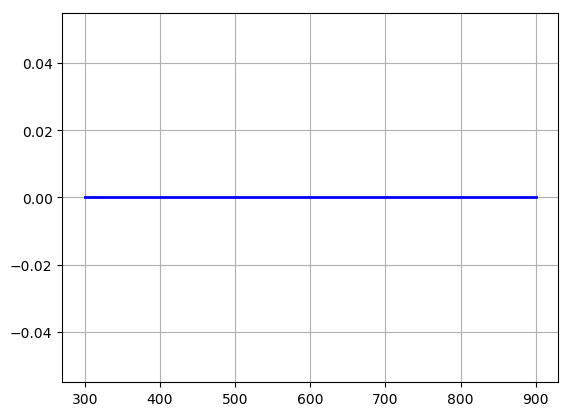

61-element Array{Float64,1}:
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 ⋮           
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310
 6.90487e-310

In [15]:
plot(Tpp,kl_A,Linestyle="-",Linewidth="2",color="b")
grid()
kl_A

In [16]:
intx=collect(0.01:0.001:0.5)
tauPH_NL_A=Array{Float64}(length(intx))
tauPH_NL_A=tauPH_NL(gammaL,VSiGe(xsp),intx,500.0,MSiGe(xsp),7728.0)#vSiGeL(xsp))
#plot(int,tauPH_NL_A,Linestyle="-",Linewidth="2",color="b")
#grid()

491-element Array{Float64,1}:
 7.22257e-8 
 5.96906e-8 
 5.01567e-8 
 4.27371e-8 
 3.68498e-8 
 3.21003e-8 
 2.82132e-8 
 2.49916e-8 
 2.22919e-8 
 2.00071e-8 
 1.80564e-8 
 1.63777e-8 
 1.49227e-8 
 ⋮          
 3.02047e-11
 3.00815e-11
 2.99591e-11
 2.98374e-11
 2.97165e-11
 2.95963e-11
 2.94769e-11
 2.93581e-11
 2.92401e-11
 2.91228e-11
 2.90062e-11
 2.88903e-11

In [17]:
kl(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,
    tauPHTOTTy,tauPHNTy,tauPHRTy,
    900.0,[7728.0,3760.0,3760.0])

(3.4831510747170037e-14,1.0081936138956332e-15,0.000328331413902214,9.357586356614964e-5,3.344285583578102e6,610287.2219243922,3.3099103958540748,1.5576799883572512,1.5576799883572512,6.425270372568576)

In [18]:
#k=1
#for tau in tauPH_NL_A
    #print("$k  ")
    #print(1./tau)
    #print("\n")
    #k=k+1
#end